# MNIST data set with logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_set_train=pd.read_csv("/Users/satyarth/Downloads/train.csv")# here we have imported train data


In [3]:
Y_train=data_set_train["label"].values
Y_train

array([1, 0, 1, ..., 7, 6, 9])

In [4]:
X_train=data_set_train.drop(["label"],axis=1)
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
P1=data_set_train.drop(["label"],axis=1)
P1

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
p2=P1.iloc[1]
p2

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 1, Length: 784, dtype: int64

In [8]:
p4=np.matrix(p2).reshape(28,28)
p4

matrix([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18,  30, 137,
         137, 192,  86,  72,   1,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  13,  86, 250, 254, 254,
         254, 254, 217, 246, 151,  32,   0,   0,   0,   0,   0,   0,   0,
           0

In [9]:
p4.shape

(28, 28)

In [10]:
p1_new=P1.iloc[100]

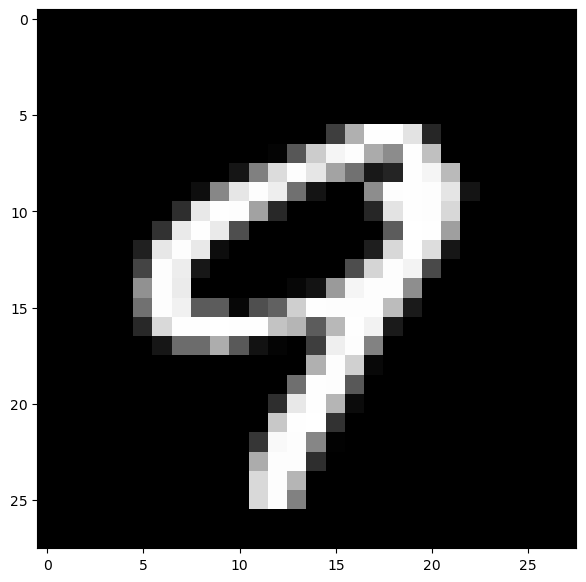

0


In [11]:
plt.figure(figsize=(7,7))
idx=100
grid_data=np.matrix(p1_new).reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()
print(p1_new[idx])

In [12]:
data_set_test=pd.read_csv("/Users/satyarth/Downloads/mnist_test.csv")

In [13]:
data_set_test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_test= data_set_test.drop(["label"],axis=1)
X_test=X_test.values

In [15]:
Y_test=data_set_test["label"].values.reshape(-1,1)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [18]:
logisticRegr.fit(X_train, Y_train)

/Users/satyarth/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(X_test[0].reshape(1,-1))

/Users/satyarth/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([7])

In [20]:
Y_pred=logisticRegr.predict(X_test)
Y_pred

/Users/satyarth/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([7, 2, 1, ..., 4, 5, 6])

In [21]:
score = logisticRegr.score(X_test, Y_test)
print(score)# it can be improved further

0.9316


/Users/satyarth/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


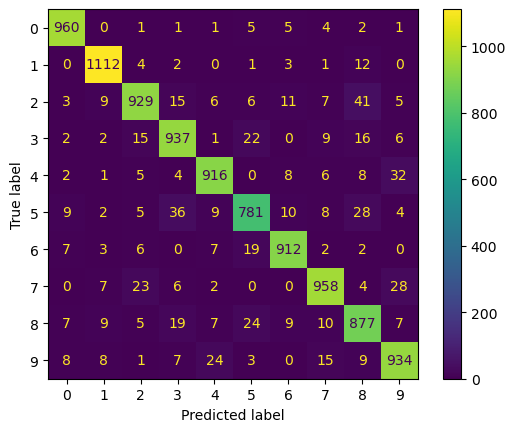

In [22]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [23]:
from sklearn.metrics import recall_score
# Calculate sensitivity (recall) score
sensitivity_score = recall_score(Y_test, Y_pred, average='micro')
print(f"Sensitivity (Recall) Score: {sensitivity_score:.2f}")

Sensitivity (Recall) Score: 0.93


# MNIST with random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [25]:
pred_random=rf.predict(X_test)

/Users/satyarth/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [26]:
from sklearn.metrics import classification_report, confusion_matrix
pred=rf.predict(X_test)
print ("Classification Report")
print(classification_report(Y_test, pred_random))
print ("Confusion Report")
print(confusion_matrix(Y_test, pred_random))


/Users/satyarth/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion Report
[[ 973    0    0    0    0    1    2    1    3    0]
 [   0 1134    0    1    0    0    0    0    0    0]
 [   2    0 1021    1    1    0    1    4    2    0]
 [   0    0    5  994    0    0    0    7  

# MNIST with Decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
clf_df=DecisionTreeClassifier()
clf_df.fit(X_train,Y_train)

DecisionTreeClassifier()

In [34]:
Y_pred_df= clf_df.predict(X_test)
Y_pred_df


/Users/satyarth/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([7, 2, 1, ..., 4, 5, 6])

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
pred=clf_df.predict(X_test)
print ("Classification Report")
print(classification_report(Y_test,Y_pred_df))
print ("Confusion Report")
print(confusion_matrix(Y_test, Y_pred_df))


Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.96      0.93      0.94      1010
           4       0.94      0.95      0.95       982
           5       0.93      0.93      0.93       892
           6       0.96      0.95      0.95       958
           7       0.95      0.96      0.96      1028
           8       0.93      0.92      0.93       974
           9       0.93      0.94      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

Confusion Report
[[ 955    1    2    0    5    4    5    4    2    2]
 [   0 1120    5    1    2    1    0    1    4    1]
 [   7    9  969    7    7    5    6    8   11    3]
 [   1    2   14  939    4   13    2   15  

/Users/satyarth/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# MNIST with SVM

In [76]:
order = list(np.sort(data_set_train['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/Users/satyarth/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

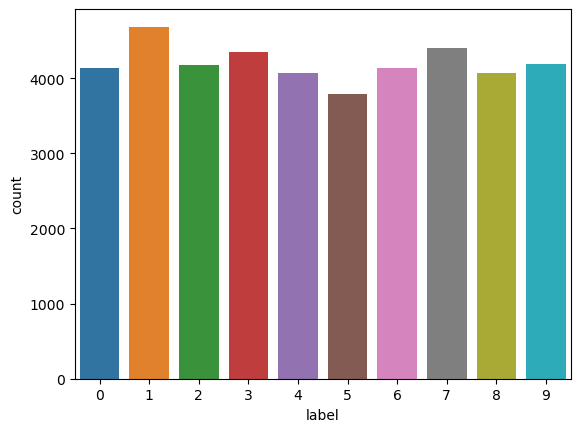

In [79]:
import seaborn as sns
sns.countplot(data_set_train["label"])

Text(0.5, 1.0, 'Digit 4')

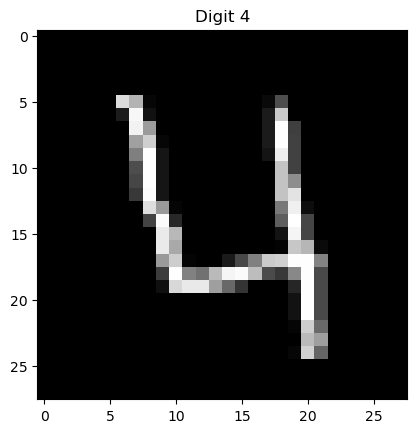

In [81]:
four = data_set_train.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

In [31]:
# Normalizing the data
X_train_svm = X_train/255.0
X_test_svm = X_test/255.0

# Printing the shape of the Datasets
print('x_train shape:', X_train_svm.shape)
print(X_train_svm.shape[0], 'train samples')
print(X_test_svm.shape[0], 'test samples')

x_train shape: (42000, 784)
42000 train samples
10000 test samples


In [ ]:
from sklearn.svm import SVC# I am unable to run this code as I am seeing it is processing not completing
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, Y_train)

# predict
y_pred = model_linear.predict(X_test)

In [ ]:
lst_actual_class = Y_test# I am unable to run this 
lst_predicted_class = Y_pred

# Class = digit labels 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
lst_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] # Must in order

# Compute multi-class confusion matrix
arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results
store_sens = [];
store_spec = [];
store_acc = [];
store_bal_acc = [];
store_prec = [];
store_fscore = [];
store_mcc = [];

# Loop for each taget label
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Predicted Performance of Digit Label/Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    precision = round(tp/(tp + fp), 3)
    fscore = round((2 * ((precision * sensitivity) / (precision + sensitivity))), 3)
    mcc = round((((tp * tn)-(fp * fn))/ math.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))),3)
    store_sens.append(sensitivity);
    store_spec.append(specificity);
    store_acc.append(accuracy);
    store_bal_acc.append(balanced_accuracy);
    store_prec.append(precision);
    store_fscore.append(fscore);
    store_mcc.append(mcc);
    
    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Sensitivity: {0}".format(sensitivity));
    print("Specificity: {0}".format(specificity));
    print("Accuracy: {0}".format(accuracy));
    print("Balanced Accuracy: {0}".format(balanced_accuracy));
    print("Precision: {0}".format(precision));
    print("F1-Score: {0}".format(fscore))
    print("MCC: {0}\n".format(mcc))


# Note 